# Timings
Here, the timings for different hierarchy complexity are compared. The system is set up, but the simulations are not run because some of the larger complexity have runtimes on the order of 10 hours. 

In [1]:
import cmath
import sys
import cmath
import math
import os
import h5py
import matplotlib.pyplot as plt   # plots

import numpy as np


if sys.platform=="cygwin":
    from cyglibra_core import *
elif sys.platform=="linux" or sys.platform=="linux2":
    from liblibra_core import *
import util.libutil as comn
from libra_py import units
import libra_py.dynamics.heom.compute as compute
from libra_py import ft


plt.rc('axes', titlesize=38)      # fontsize of the axes title
plt.rc('axes', labelsize=38)      # fontsize of the x and y labels
plt.rc('legend', fontsize=38)     # legend fontsize
plt.rc('xtick', labelsize=38)    # fontsize of the tick labels
plt.rc('ytick', labelsize=38)    # fontsize of the tick labels

plt.rc('figure.subplot', left=0.2)
plt.rc('figure.subplot', right=0.95)
plt.rc('figure.subplot', bottom=0.13)
plt.rc('figure.subplot', top=0.88)

colors = {}

colors.update({"11": "#8b1a0e"})  # red       
colors.update({"12": "#FF4500"})  # orangered 
colors.update({"13": "#B22222"})  # firebrick 
colors.update({"14": "#DC143C"})  # crimson   

colors.update({"21": "#5e9c36"})  # green
colors.update({"22": "#006400"})  # darkgreen  
colors.update({"23": "#228B22"})  # forestgreen
colors.update({"24": "#808000"})  # olive      

colors.update({"31": "#8A2BE2"})  # blueviolet
colors.update({"32": "#00008B"})  # darkblue  

colors.update({"41": "#2F4F4F"})  # darkslategray

clrs_index = ["11", "21", "31", "41", "12", "22", "32", "13","23", "14", "24"]

/home/storytemen/miniconda2/envs/py37/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > > already registered; second conversion method ignored.
  return f(*args, **kwds)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for boost::python::detail::container_element<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, unsigned long, boost::python::detail::final_vector_derived_policies<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, false> > already registered; second conversion method ignored.
  return f(*args, **kwds)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for std::vector<std::vector<flo

Set up the system and parameters of the first run. 

In [2]:
from libra_py import units
import libra_py.dynamics.heom.compute as compute

Ham = CMATRIX(2,2)
Ham.set(0, 0, 50.0 * units.inv_cm2Ha);    Ham.set(0, 1, 200.0 * units.inv_cm2Ha);
Ham.set(1, 0,200.0 * units.inv_cm2Ha);    Ham.set(1, 1, -50.0 * units.inv_cm2Ha);

rho = CMATRIX(2,2)
rho.set(0, 0, 1.0+0.0j)


params = { "KK":0, "LL":2,
           "gamma": 10/(1 * units.ps2au),
           "eta": 2.0 * 50.0 * units.inv_cm2Ha,
           "temperature": 300.0,
           "el_phon_couplings":initialize_el_phonon_couplings(2),

           "dt":0.1*units.fs2au, "nsteps":10,
           "verbosity":-1, "progress_frequency":0.1,

           "truncation_scheme":4, "do_scale":0,
           "adm_tolerance":1e-10, "adm_deriv_tolerance":1e-15,
           "filter_after_steps":1,"do_zeroing":1,
           "num_threads":1,

           "prefix":"out",
           "hdf5_output_level":0, "txt_output_level":0, "mem_output_level":3,
           "properties_to_save": [ "timestep", "time", "denmat"],
           "use_compression":0, "compression_level":[0,0,0]
         }

The dynamics are then run for these starting parameters, and the KK and LL parameters are updated to vary complexity.

In [3]:
#compute.run_dynamics(params, Ham, rho)

params.update({"KK":1})
#compute.run_dynamics(params, Ham, rho)

params.update({"KK":2})
#compute.run_dynamics(params, Ham, rho)

params.update({"KK":3})
#compute.run_dynamics(params, Ham, rho)

params.update({"KK":4})
#compute.run_dynamics(params, Ham, rho)

params.update({"KK":5})
#compute.run_dynamics(params, Ham, rho)

params.update({"LL": 4, "KK":0})
#compute.run_dynamics(params, Ham, rho)

params.update({"KK":1})
#compute.run_dynamics(params, Ham, rho)

params.update({"KK":2})
#compute.run_dynamics(params, Ham, rho)

params.update({"KK":3})
#compute.run_dynamics(params, Ham, rho)

params.update({"KK":4})
#compute.run_dynamics(params, Ham, rho)

params.update({"KK":5})
#compute.run_dynamics(params, Ham, rho)

params.update({"LL": 6, "KK":0})
#compute.run_dynamics(params, Ham, rho)
# And so on

Next, we plot the timings against complexities.

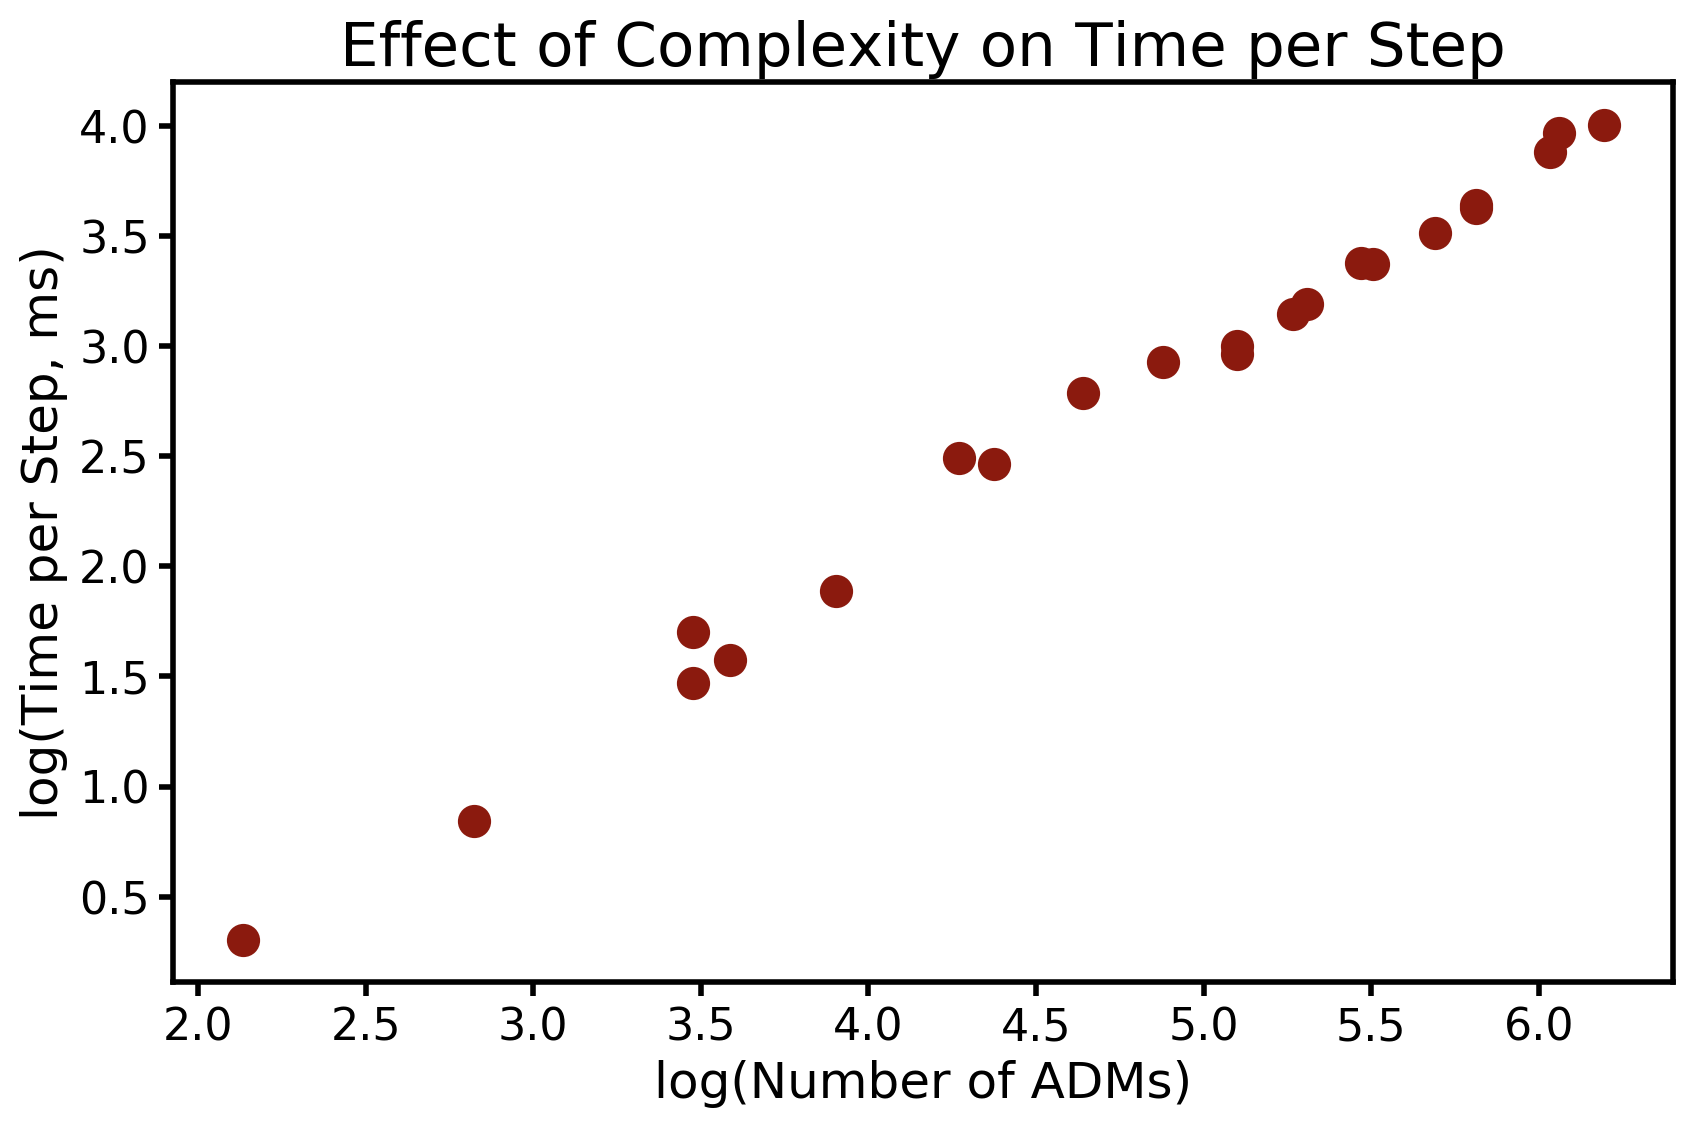

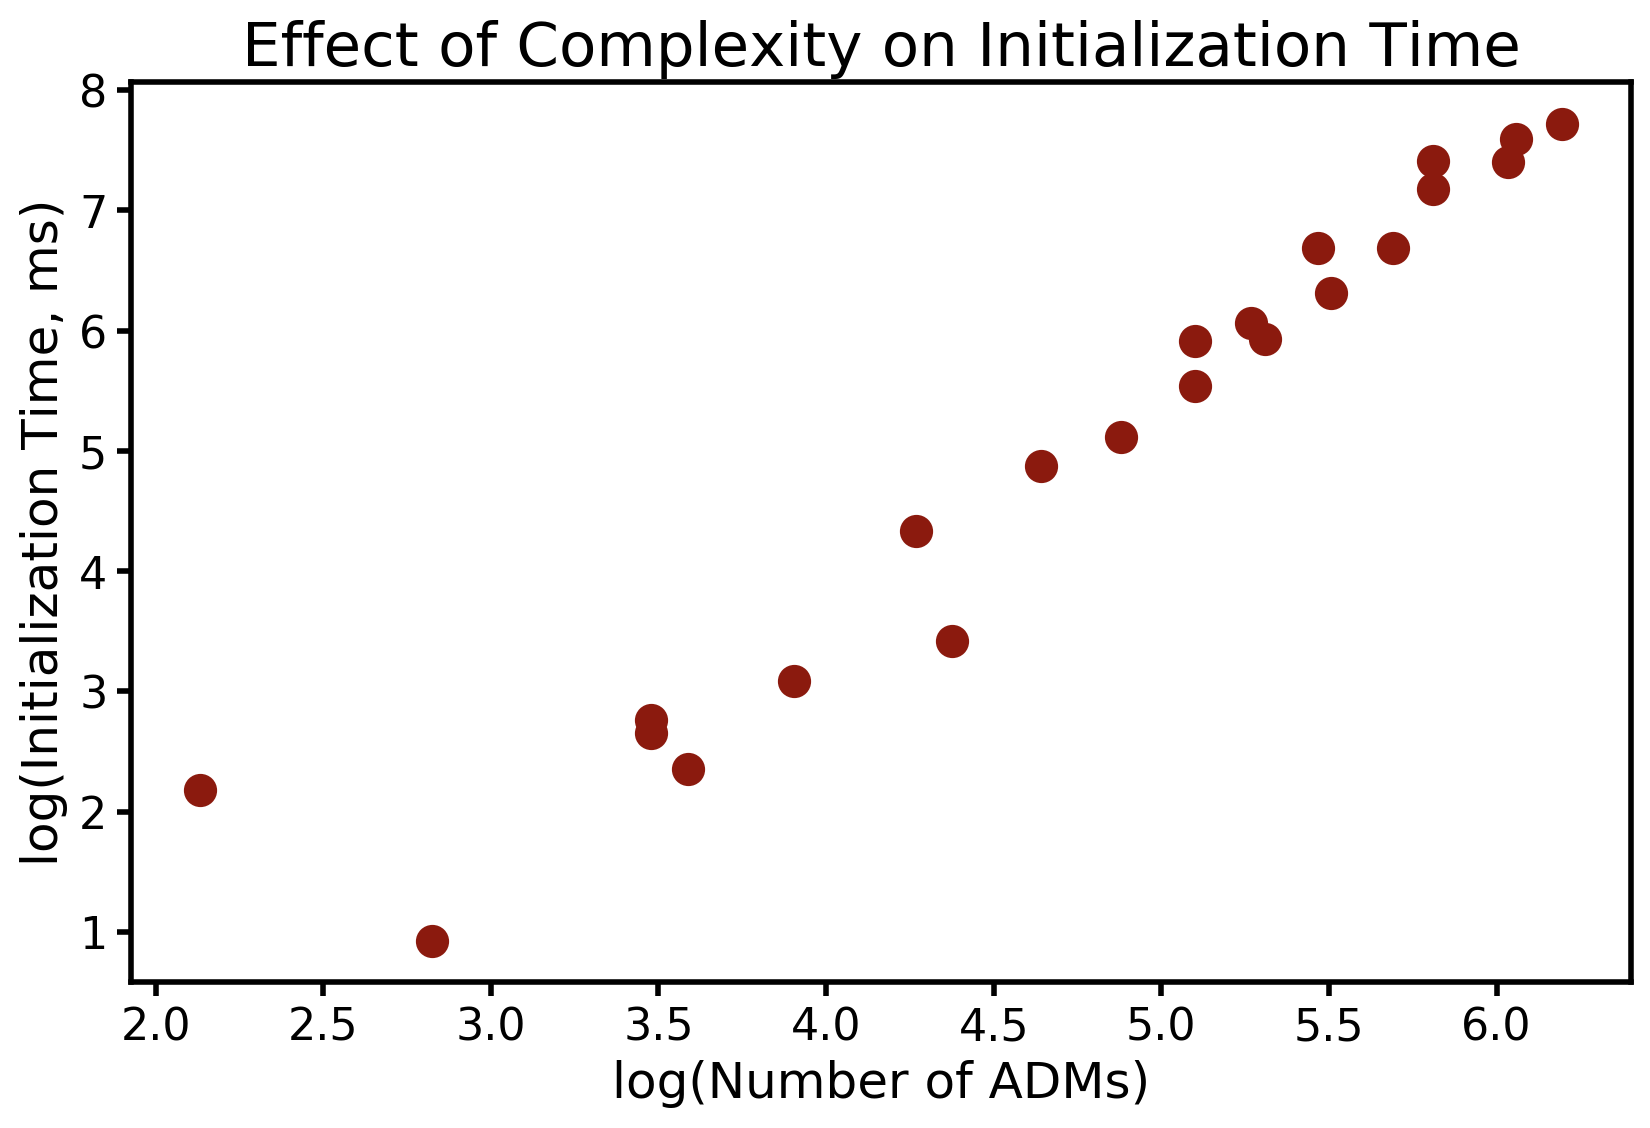

In [6]:
data_file = np.loadtxt("runtime_vs_num_adm.csv", delimiter=",", dtype='float') # import data

init_time = data_file[:,0]
time_per_step = data_file[:,1]
num_adm = data_file[:,2]

# Convert data into log scale
log_num_adm = num_adm
for i in range(len(num_adm)):
    log_num_adm[i] = math.log(num_adm[i], 10)

log_init_time = init_time
for i in range(len(init_time)):
    log_init_time[i] = math.log(init_time[i], 10)

log_time_per_step = time_per_step
for i in range(len(time_per_step)):
    log_time_per_step[i] = math.log(time_per_step[i], 10)


fig = plt.figure(1, figsize=(10,6), dpi=200)
plt.subplot(1,1,1)
ax = plt.gca()
plt.title('Effect of Complexity on Time per Step', fontsize=22)
plt.xlabel('log(Number of ADMs)',fontsize=18)
plt.ylabel('log(Time per Step, ms)',fontsize=18)
plt.scatter(log_num_adm, log_time_per_step, color = colors["11"], s=120)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.tick_params(length=5, width=2, labelsize=16)
plt.show()
plt.close()

fig = plt.figure(1, figsize=(10,6), dpi=200)
plt.subplot(1,1,1)
ax = plt.gca()
plt.title('Effect of Complexity on Initialization Time', fontsize=22)
plt.xlabel('log(Number of ADMs)',fontsize=18)
plt.ylabel('log(Initialization Time, ms)',fontsize=18)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.tick_params(length=5, width=2, labelsize=16)
plt.scatter(log_num_adm, log_init_time, color = colors["11"], s=120)
plt.show()
plt.close()